<div style="border:solid lightblue 2px; padding: 20px">

<b>Евгений, привет!</b>

Меня зовут Олег Пыхалов, и я буду проверять твой проект. 
Предлагаю общаться на «ты» 😉 Но если это не удобно - дай знать, и мы перейдем на "вы".

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Тобой уже проделана большая работа над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 

Твой проект станет намного удобней в использовании, если ты добавишь интерактивное оглавление — с помощью гиперссылок или в плагине toc. Материал об этом есть в блоке курса Полезные инструкции для учёбы - Оформление проекта - Изменения в Jupyter: автоматическое оглавление и горячие клавиши
    
</div>

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = "\t") # откроем файл
#data = pd.read_csv('/datasets/real_estate_data.csv')
display (data.head(10)) #и посмотрим на то, как выглядят данные на примере первых 10 позиций

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> 
    
- Блок загрузки библиотек лучше размещать в отдельной от остального кода ячейке. Такой подход позволит улучшить читаемость кода, снизит время поиска ошибок (если они есть) и исключит повторное выполнение кода. 

- Неиспользуемые строки кода лучше удалять
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 

Молодец, что загружаешь все библиотеки в начале проекта. Так сложней случайно удалить ячейку с загрузкой нужной библиотеки и сделать код не работающим. А получатель отчета сразу поймет, какие библиотеки ты используешь и какие ему нужно установить для запуска проекта.
    
</div>

Для удобства дальнейшей работы вставим определения каждого параметра
Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

**balcony** — число балконов

**ceiling_height** — высота потолков (м)

**cityCenters_nearest** — расстояние до центра города (м)

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

**first_day_exposition** — дата публикации

**floor** — этаж

**floors_total** — всего этажей в доме

**is_apartment** — апартаменты (булев тип)

**kitchen_area** — площадь кухни в квадратных метрах (м²)

**last_price** — цена на момент снятия с публикации

**living_area** — жилая площадь в квадратных метрах (м²)

**locality_name** — название населённого пункта

**open_plan** — свободная планировка (булев тип)

**parks_around3000** — число парков в радиусе 3 км

**parks_nearest** — расстояние до ближайшего парка (м)

**ponds_around3000** — число водоёмов в радиусе 3 км

**ponds_nearest** — расстояние до ближайшего водоёма (м)

**rooms** — число комнат

**studio** — квартира-студия (булев тип)

**total_area** — общая площадь квартиры в квадратных метрах (м²)

**total_images** — число фотографий квартиры в объявлении

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 

Здорово, что во вступлении к твоему проекту есть:

- заголовок,

- краткое описание проекта,

- цель проекта,

- описание данных,

Вступление станет лучше, если ты добавишь в него:

- план работы.

Тогда получатель отчета сможет быстрей его понять.

</div>

Переменные представлены в хорошем виде, это плюс, нам не нужно будет их переименовывать и можно сразу приступать к работе с данными

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 

Позволь побуду немного занудой, но это не переменные, а имена колонок 🙃

</div>

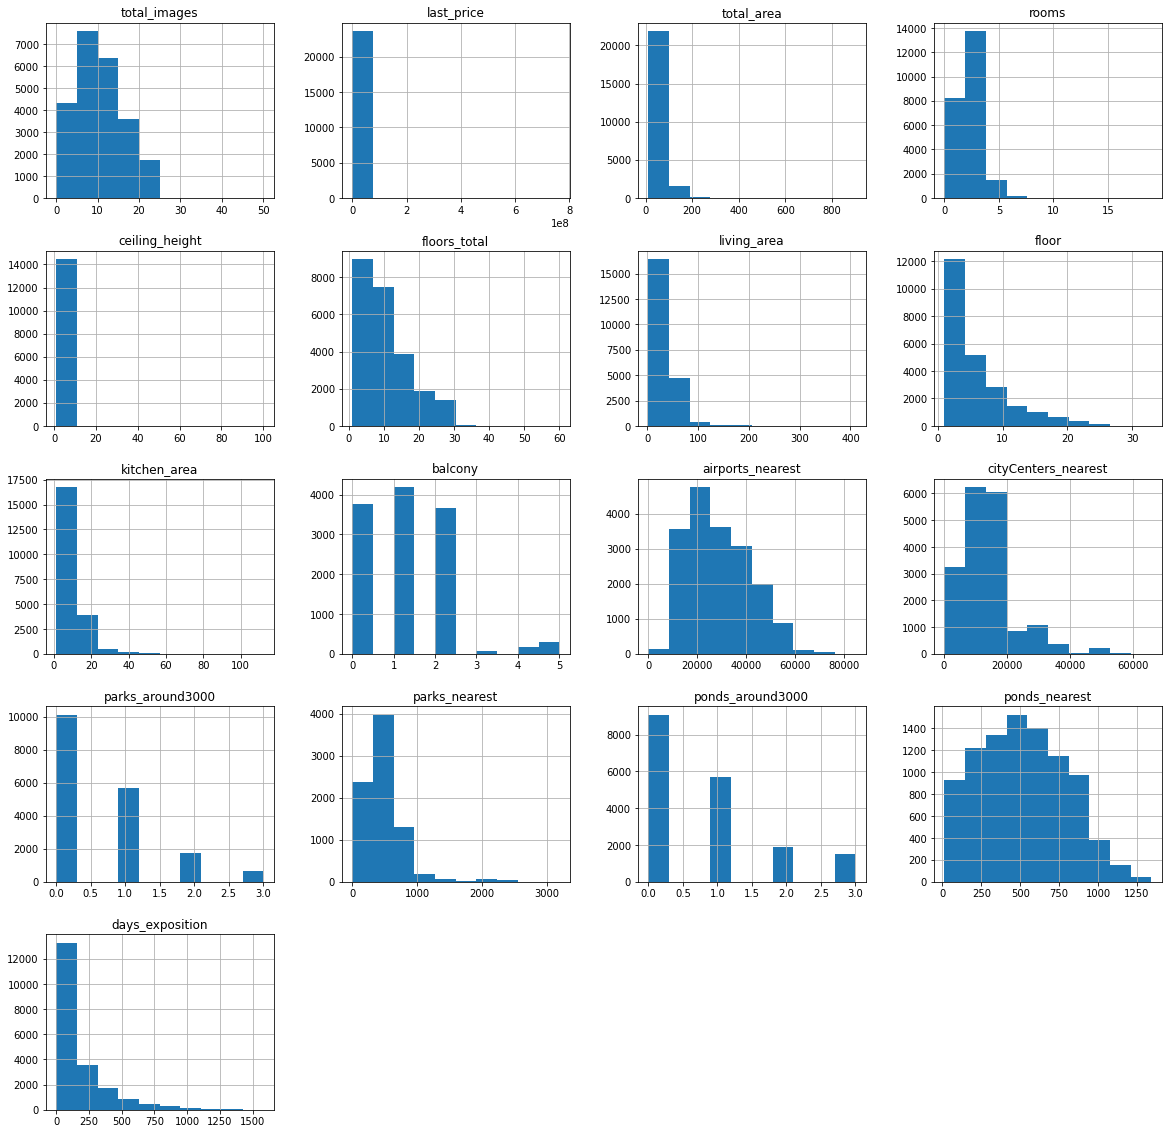

In [2]:
data.hist(figsize=(20, 20)); #посмотрим на гистограммы

достаточно странно выглядит график для цены, что произошло из-за единиц измерения. Так как разброс цен большой, нам стоит чуть больше времени уделить внимание обработке данной переменной далее

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 

☝️ В конце каждого раздела лучше делать общий вывод

</div>

### Предобработка данных

In [3]:
data.info() #посмотрим на состав и тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски видно в пременных ceiling_height, floors_total, living_area, is_apartment,  kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, 
parks_nearest, ponds_around3000, ponds_nearest, days_exposition

In [4]:
data.duplicated().sum() #проверим на дубликаты

0

Дубликатов не обнаружено.
Дальше посмотрим на то, какие именно значения пропущенны и в каких количествах

In [5]:
data.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Начнем со столбца locality_name, пропущенных значений всего 49, заполнить их у нас нет никакого способа, в данных не учтены координаты или другие признако, которые могли бы нам помочь. Можно поиграть в игру "угадай населенный пункт", но мы этого делать не будем. 

Количество значений незначительно, соответственно данные строки просто удалим.

Причина данных пропусков, скорее всего, человеческая ошибка, заносивший данные не внес название населенного пункта, либо не знает его. Также возможна техническая ошибка, однако техническая ошибка, скорее всего, носила бы более массовый характер

In [6]:
data = data.dropna(subset = ['locality_name']); #избавились от строк с пропусками, индекс перезаписывать на данный момент не будем, сделаем это позднее

Раз мы уже начали работать со столбцом locality_name, посмотрим на его уникальные значения и постараемся выявить неявные дубликаты

In [7]:
display (len(data['locality_name'].unique())) #посчитаем количество уникальных значений
display (data['locality_name'].unique()) #и посмотрим на них

364

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Единственное, что мы можем с точностью сделать - заменить все Е на Ё, так как у нас нет под рукой базы данных населенных пунктов с которой мы могли бы сравнить наши данные, мы не можем с 100% точностью заменить все ПГТ на поселки и т.д., очень много населенных пунктов носят одинаковые названия.

Немного удивительной информации - в России 333 населенных пункта носят название "Александровка", 280 -  "Ивановка" и 272 -  "Михайловка"

In [8]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
len(data['locality_name'].unique())

330

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 

Классный способ используешь для обработки строковых данных в колонке через `str.replace()` 👍
    
☝️ Подумай, возможно есть ещё способы сократить количество уникальных
    
</div>

Было 365, стало 331, немного лучше, мы показали, что умеем менять буквы в таблице, этого должно быть достаточно в рамках данного исследования

Дальше посмотрим на показатель floors_total

In [9]:
display(data[data['floors_total'].isna()]) #мы видим, что это не одноэтажные строения, значит, пропуск снова произошел из-за человеческого фактора или технической ошибки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [10]:
data.dropna(subset = ['floors_total']); #избавимся от этих значений, выборка достаточно большая, мы можем ими пожертвовать

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
☝️ Чтобы сработало удаление пустых строк по колонке `floors_total` нужно:
    
- либо переприсвоить получившийся результат исходной переменной
   
- либо применить нужный параметр
    
</div>

С показателями living_area и total_area мы не можем сделать ничего.

Для анализа влияния конкретно этих показателей 

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>

Что касается пропусков, то:
- с `total_area` нам ничего делать не нужно, т.к. нет пропусков
    
- `living_area`, `kitchen_area` и `ceiling_height` основные параметры квартиры и очень часто они типовые, есть множество способов их заполнить. Это нужно сделать. Подумай, от чего зависят данные параметры. Можно взглянуть, например, на корреляции данных площадей и других параметров квартиры для нахождения наиболее сильной зависимости.

</div>

In [11]:
test = data[data['living_area'].isna()]

display (test.query('studio == True')) #проверили, может, получится всю полщадь для студий записать в жилую, но такой подход не решит нашей проблемы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
608,2,1850000.0,25.0,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
2409,4,1980000.0,27.0,2018-03-23T00:00:00,0,NaN,18.0,NaN,4,NaN,...,NaN,NaN,поселок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75.0
3147,7,2170000.0,31.0,2017-12-30T00:00:00,0,2.6,12.0,NaN,12,NaN,...,NaN,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.0
3874,13,1700000.0,21.4,2015-02-11T00:00:00,0,2.7,3.0,NaN,2,NaN,...,NaN,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4901,5,2200000.0,24.0,2018-10-22T00:00:00,0,NaN,NaN,NaN,6,NaN,...,NaN,NaN,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.0
5187,5,3300000.0,25.4,2018-11-02T00:00:00,0,NaN,NaN,NaN,15,NaN,...,NaN,NaN,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5958,1,3200000.0,30.3,2018-09-07T00:00:00,0,NaN,NaN,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,68.0
8454,7,2250000.0,19.0,2019-03-12T00:00:00,0,3.0,6.0,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0
18028,11,3500000.0,31.0,2019-04-17T00:00:00,0,NaN,25.0,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,21460.0,16788.0,0.0,NaN,1.0,170.0,NaN
23554,15,3350000.0,26.0,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [12]:
display(data[data['days_exposition'].isna()]) 
#посмотрим на записи с отсутствием данных о том, сколько дней было размещено объявление (от публикации до снятия)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,...,7.00,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Если посмотреть на данные о первом дне размещения, мы видим большой разброс, не похоже, чтобы это были свежие и еще открытые объявления. Пока оставим их в покое.

Дальше посмотрим на показатель аппартаментов

In [13]:
print(data['is_apartment'].unique())
#логично, что многие люди не владеющие апартаментами, просто пропустят данный пункт, соответственно, поменяем nan на False
data['is_apartment']=data['is_apartment'].fillna(False) #заменили nan на False
print(data['is_apartment'].unique()) #и посмотрели, что больше пропущенных значений нет

[nan False True]
[False  True]


In [14]:
print(data['balcony'].unique()) #Посмотрим количество балконов.
#Ситуация аналогична параметру апартаментов, человек без балкона просто не будет заполнять данный пункт
data['balcony']=data['balcony'].fillna(0) #заменили nan на 0
data['balcony'].unique() #и посмотрели, что больше пропущенных значений нет

[nan  2.  0.  1.  5.  4.  3.]


array([0., 2., 1., 5., 4., 3.])

5 балконов - выглядит сомнительно, но все возможно

In [15]:
display(data[data['balcony'] == 5])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.00,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.80,2015-07-08T00:00:00,4,2.80,4.0,80.9,2,False,...,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
116,18,10999000.0,97.20,2017-11-13T00:00:00,3,2.50,16.0,NaN,16,False,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
267,2,14700000.0,120.00,2018-09-07T00:00:00,3,2.75,20.0,63.0,18,False,...,16.0,5.0,Санкт-Петербург,39204.0,10430.0,2.0,627.0,3.0,77.0,61.0
311,20,12500000.0,86.00,2018-10-19T00:00:00,3,2.80,25.0,47.0,3,False,...,13.0,5.0,Санкт-Петербург,52192.0,15686.0,0.0,NaN,1.0,441.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23147,8,5780000.0,55.00,2017-11-23T00:00:00,2,2.55,10.0,28.6,8,False,...,8.0,5.0,Санкт-Петербург,42447.0,11146.0,1.0,451.0,0.0,NaN,41.0
23289,13,7000000.0,88.00,2018-03-02T00:00:00,3,2.50,15.0,54.0,12,False,...,12.0,5.0,Колпино,24501.0,30287.0,1.0,372.0,0.0,NaN,NaN
23363,10,4300000.0,52.00,2019-04-21T00:00:00,1,2.70,16.0,28.0,8,False,...,11.0,5.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23526,14,5800000.0,60.69,2018-03-13T00:00:00,3,2.50,9.0,39.7,2,False,...,6.2,5.0,Санкт-Петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0


однокомнатная квартира в 52 квадрата с 5 балконами - выглядит очень странно, но доказательств ошибки у нас нет, может, опечатка, может, шутка, а может и реальность.

Формат first_day_exposition нас неустраивает, с ним невозможно работать, сделаем из него временной формат. В данных нет времени, да и для анализа оно нам не нужно

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
display (data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


С показателями местоположения - airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest что-то сделать сложно, скорее всего люди или не знают, или не имеют рядом данных 
С показателями
ceiling_height, , days_exposition

In [17]:
display (data.query('(parks_around3000.isnull()) & (parks_nearest.isnull())'))
#таким образом мы проверили, что нет показателей, когда люди указали один из показателей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,NaN,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5.0,45.50,3,False,...,5.50,0.0,поселок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07,1,NaN,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.70,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.isnull().sum().sort_values() #посмотрим на итоговые данные

total_images                0
locality_name               0
balcony                     0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total               85
living_area              1898
kitchen_area             2269
days_exposition          3180
parks_around3000         5510
ponds_around3000         5510
cityCenters_nearest      5511
airports_nearest         5534
ceiling_height           9160
ponds_nearest           14565
parks_nearest           15586
dtype: int64

Не идеально, но стало лучше

In [19]:
data.describe() #посмотрим на то, что в целом представляют из себя данные

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,14490.000000,23565.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.771287,10.675875,34.448356,5.893277,10.566403,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,1.261593,6.594823,22.037664,4.883317,5.901753,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Выбивающиеся значения точно есть в столбцах ceiling_height - 100 метровых потолков в жилых домах не бывает, как и метровых

Квартиры в 900 квадратов вполне реальны, но портят нам картинку, такие квартиры, скорее всего, будут и самыми дорогими и самыми долго продающимися

Небоскребы существуют, мы это знаем, но дома в 60 этажей тоже подпортят нам исследование

Мы не будем применять процентили и прочее для подсчета, а сконцентрируемся на конкретной картинке

In [20]:
print(data['floors_total'].value_counts()) #Посмотрим на то, как выглядят данные
data = data.query('floors_total < 40')

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64


In [21]:
print(data['rooms'].value_counts()) 
data = data.query('rooms < 7')

1     8003
2     7896
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


Но что мы видим, квартиры с 0 комнат - такого не может быть, возможно, это студии
посмотрим

In [22]:
display(data.query('(rooms == 0) & (studio == False)')['total_area'].count())

59

In [23]:
display(data.query('studio == True')['rooms'].value_counts())

0    135
1     11
Name: rooms, dtype: int64

удивительно, но некоторые студии имеют 0 комнат, а некоторые - 1, заменим все значения для студий на 1

In [24]:
data.loc[(data['studio'] == True), 'rooms'] = 1 #заменили студиям количество комнат на 1
display(data.query('studio == True')['rooms'].value_counts()) #проверили
print(data['rooms'].value_counts()) #но нулевые значения еще остались

1    146
Name: rooms, dtype: int64

1    8138
2    7896
3    5779
4    1172
5     325
6     104
0      59
Name: rooms, dtype: int64


In [25]:
data = data.query('rooms != 0') #их мы просто удалим
print(data['rooms'].value_counts())

1    8138
2    7896
3    5779
4    1172
5     325
6     104
Name: rooms, dtype: int64


большая часть значения total_area находится на уровне 0 - 100 м2, построим более подробную гистограму

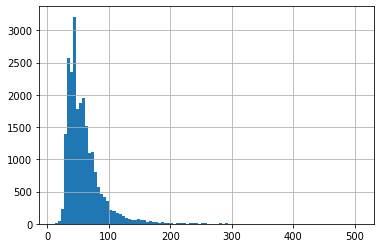

In [26]:
data['total_area'].hist(bins = 100); 

In [27]:
data = data.query('total_area < 150') #уберем данные болше 150, квартиры больше данной площади можно назвать выбивающимися

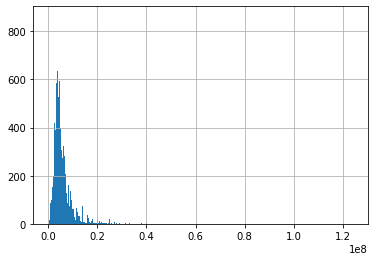

In [28]:
data['last_price'].hist(bins = 1000); #посмотрим на распределение значений цены

In [29]:
quantile = data['last_price'].quantile(0.9) #выберем 95% квантиль
data = data.query('last_price <= @quantile') # уберем все значения за ним

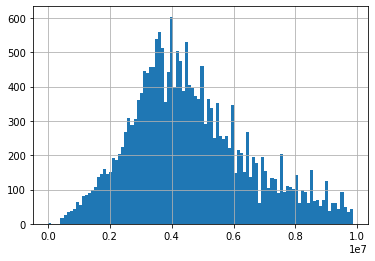

In [30]:
data['last_price'].hist(bins = 100);

In [31]:
display(data[data['ceiling_height']>10]['ceiling_height'].value_counts()) #эти значения можно исправить
display(data[data['ceiling_height']<2]['ceiling_height'].value_counts()) #этими значениями можно пожертвовать

27.0    7
25.0    7
14.0    1
20.0    1
24.0    1
27.5    1
10.3    1
22.6    1
26.0    1
32.0    1
Name: ceiling_height, dtype: int64

1.00    1
1.75    1
1.20    1
Name: ceiling_height, dtype: int64

In [32]:
data.loc[(data['ceiling_height'] >10), 'ceiling_height'] *= 0.1 #эти значения исправили
data = data.query('(ceiling_height >= 2) & (ceiling_height < 4)') 
#исправить потолки больше 4 метров нет возможности - это или экстремумы или ошибки


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>

Фильтр `data = data.query('(ceiling_height >= 2) & (ceiling_height < 4)')` удаляет и строки с пропусками. До фильтра было 20630 строк, после него сократилось почти вдвое до 12455, это слишком много. Нужно как минимум заполнить пустые значения `ceiling_height`, чтобы сократить это количество.
    
</div>

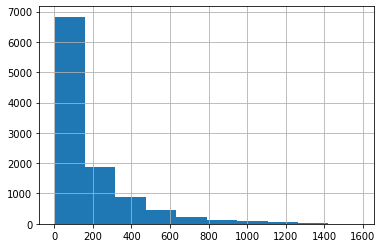

In [33]:
data['days_exposition'].hist(); #посмотрим на объявления, котрые висели на сайте слишком долго
data = data.query('days_exposition < 600') #Уберем все значения, которые висели на сайте больше 600 дней

In [34]:
data.describe() #посмотрим на то, что получилось

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,9964.000000,9.964000e+03,9964.000000,9964.000000,9964.000000,9964.000000,9407.000000,9964.000000,9290.000000,9964.000000,7761.000000,7770.000000,7770.000000,3230.000000,7770.000000,3600.000000,9964.000000
mean,9.917302,4.660420e+06,51.626677,1.903854,2.669108,10.378061,29.799189,5.659574,9.268679,0.687375,29089.391187,15223.319048,0.559202,466.688545,0.680952,544.205833,138.044862
std,5.452705,1.850152e+06,17.081321,0.872011,0.202671,6.175223,12.519071,4.623269,3.507003,0.969533,13114.922910,8546.660025,0.768915,289.137442,0.876172,278.444655,136.373147
min,0.000000,1.219000e+04,12.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,208.000000,0.000000,3.000000,0.000000,16.000000,1.000000
25%,6.000000,3.400000e+06,38.700000,1.000000,2.500000,5.000000,18.100000,2.000000,7.000000,0.000000,17837.000000,10939.000000,0.000000,281.000000,0.000000,328.000000,40.000000
50%,10.000000,4.390000e+06,48.000000,2.000000,2.600000,9.000000,28.900000,4.000000,8.600000,0.000000,27542.000000,13721.500000,0.000000,447.000000,0.000000,535.000000,87.000000
75%,14.000000,5.750000e+06,61.400000,3.000000,2.750000,14.000000,38.000000,8.000000,10.800000,1.000000,37781.000000,16536.000000,1.000000,602.000000,1.000000,755.000000,194.250000
max,35.000000,9.850000e+06,147.800000,6.000000,3.980000,36.000000,106.000000,27.000000,64.000000,5.000000,83758.000000,64857.000000,3.000000,3190.000000,3.000000,1344.000000,599.000000


Теперь данные не имеют такой сильный разброс

### Посчитайте и добавьте в таблицу новые столбцы

In [35]:
data['m2_price'] = data['last_price'] / data['total_area'] #добавим цену квадратного метра
data['publ_day'] = data['first_day_exposition'].dt.weekday #добавим день публикации объявления
data['publ_month'] = data['first_day_exposition'].dt.month #добавим месяц публикации объявления
data['publ_year'] = data['first_day_exposition'].dt.year #добавим год публикации объявления
display(data.head()) #и посмотрим на нее

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,publ_day,publ_month,publ_year
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,33058.0,1.0,294.0,3.0,298.0,366.0,82943.925234,5,7,2017
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,10698.0,3.0,420.0,0.0,NaN,397.0,81707.317073,3,11,2017
18,8,3250000.0,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,...,10842.0,1.0,759.0,0.0,NaN,168.0,104838.709677,4,1,2017


Для типа этажа квартиры нам нужно будет объявит функцию

In [36]:
def floor_type(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [37]:
data['floor_status'] = data.apply(floor_type, axis=1)
display(data.head()) #работает)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,publ_day,publ_month,publ_year,floor_status
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,1.0,294.0,3.0,298.0,366.0,82943.925234,5,7,2017,последний
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,3.0,420.0,0.0,NaN,397.0,81707.317073,3,11,2017,первый
18,8,3250000.0,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,...,1.0,759.0,0.0,NaN,168.0,104838.709677,4,1,2017,другой


Смысла держать 2 переменные с одинаковым значением не имеет смысла, поэтому мы просто поменяем значения в переменной cityCenters_nearest

In [38]:
data ['cityCenters_nearest'] *= 0.001 #просто разделим на 1000

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>

☝️ Не забудь так же что по заданию: ...(переведите из м в км и **округлите до целых значений**).

</div>

### Проведите исследовательский анализ данных

На данном этапе посмотрим на характеристики значений итоговой таблицы
цена объекта;

In [39]:
needed = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_status', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'publ_day', 'publ_month' ]
sample = data.loc[: , needed]
display (sample.describe())

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,publ_day,publ_month
count,9964.000000,9407.000000,9290.000000,9.964000e+03,9964.000000,9964.000000,9964.000000,9964.000000,7770.000000,7761.000000,3230.000000,9964.000000,9964.000000
mean,51.626677,29.799189,9.268679,4.660420e+06,1.903854,2.669108,5.659574,10.378061,15.223319,29089.391187,466.688545,2.532718,6.576475
std,17.081321,12.519071,3.507003,1.850152e+06,0.872011,0.202671,4.623269,6.175223,8.546660,13114.922910,289.137442,1.787584,3.503840
min,12.000000,2.000000,2.000000,1.219000e+04,1.000000,2.000000,1.000000,1.000000,0.208000,0.000000,3.000000,0.000000,1.000000
25%,38.700000,18.100000,7.000000,3.400000e+06,1.000000,2.500000,2.000000,5.000000,10.939000,17837.000000,281.000000,1.000000,3.000000
50%,48.000000,28.900000,8.600000,4.390000e+06,2.000000,2.600000,4.000000,9.000000,13.721500,27542.000000,447.000000,2.000000,7.000000
75%,61.400000,38.000000,10.800000,5.750000e+06,3.000000,2.750000,8.000000,14.000000,16.536000,37781.000000,602.000000,4.000000,10.000000
max,147.800000,106.000000,64.000000,9.850000e+06,6.000000,3.980000,27.000000,36.000000,64.857000,83758.000000,3190.000000,6.000000,12.000000


Мы посмотрели на выборку из параметров, отбросив менее релевантные

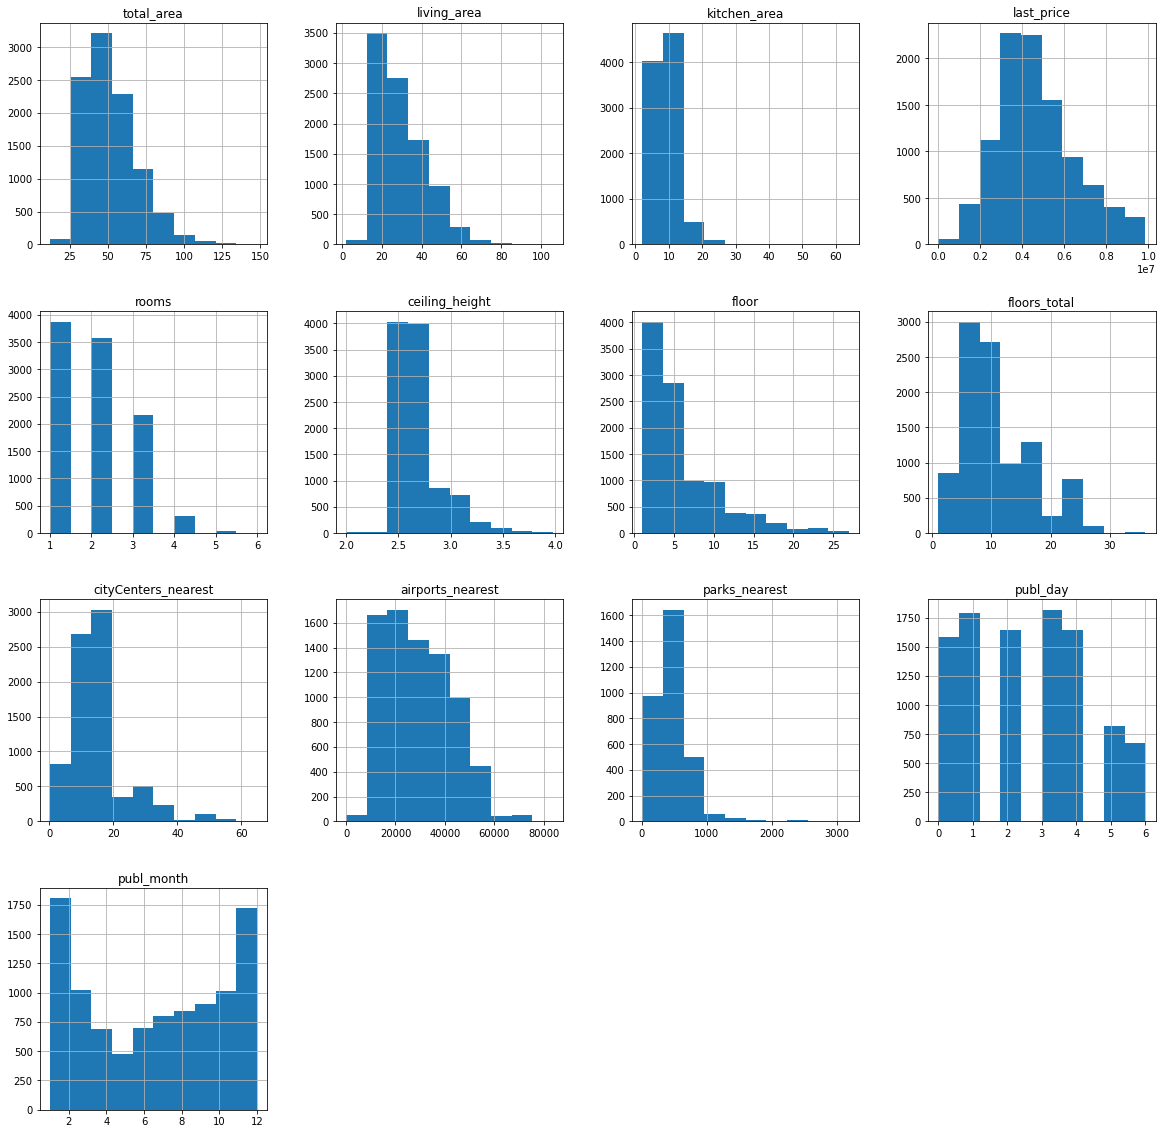

In [40]:
sample.hist(figsize = (20,20));

Опишем основные параметры переменных. Мы не будем расписывать все во избежание максимально очевидных выводов)

общая площадь - большинство квартир имеют площадь от 25 до 75 квадратных метров
жилая площадь - при этом жилая площадь составляет в среднем порядка 30 м2
площадь кухни - а кухни - 8 - 10 квадратов 
цена объекта - большинство квартир имеют стоимость в районе 5 млн. руб.
количество комнат - чем больше комнат, тем меньше квартир
высота потолков - неудивительно, что потолки находятся в основном в диапазоне 2,5 - 3 метров
общее количество этажей в доме - что логично - домов с меньшим количеством этажей больше, чем высоток (спасибо плановой застройке и типовым домам)
день и месяц публикации объявления - удивительно, но люди реже размещают объявления о продаже на выходных и весной, а чаще к концу / началу года, возможно это связано с годовыми премиями, позволяющими улучшить условия жизни? ведь точно такую же статистику мы видим обычно с автомобилями

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>
    
Хорошо что ты описал наблюдения, но:
    
- выводы могут быть очевидны не для всех, поэтому лучше описать каждую гистограмму
   
- будет круто, если между описаниями появятся какие-то разделения, как например в текущем комментарии с переносом по строкам :)

</div>


count    9964.000000
mean      138.044862
std       136.373147
min         1.000000
25%        40.000000
50%        87.000000
75%       194.250000
max       599.000000
Name: days_exposition, dtype: float64


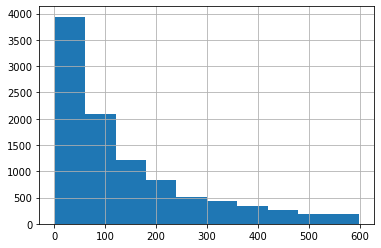

In [41]:
data['days_exposition'].hist();
print(data['days_exposition'].describe())

В среднем, квартиры продаются за 3-4 месяца, однако некоторые лоты могут быть в продаже и больше года

Среднее арифметическое значение - 138 дней

Медиана - 87 дней

Необыайно быстрые продажи - менее недели, такие значения вполне реальны и не являются ошибочными



Посмотрим на общую матрице корреляции нашей выборки показателей

In [42]:
sample.corr()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,publ_day,publ_month
total_area,1.000000,0.912160,0.399726,0.671285,0.806523,0.298137,-0.050595,-0.032187,-0.092366,-0.024646,-0.030876,-0.012974,0.006350
living_area,0.912160,1.000000,0.108357,0.554523,0.901227,0.208543,-0.158236,-0.189229,-0.090427,-0.045838,-0.058734,-0.008642,-0.000266
kitchen_area,0.399726,0.108357,1.000000,0.441240,0.005591,0.355162,0.237482,0.351844,-0.089084,-0.006143,0.028010,-0.018268,0.001275
last_price,0.671285,0.554523,0.441240,1.000000,0.437998,0.416681,0.141937,0.228688,-0.338336,-0.043345,-0.014676,-0.016133,0.009374
rooms,0.806523,0.901227,0.005591,0.437998,1.000000,0.069921,-0.193150,-0.235451,-0.058664,-0.045980,-0.049121,-0.002553,0.003392
ceiling_height,0.298137,0.208543,0.355162,0.416681,0.069921,1.000000,0.007093,0.018936,-0.275347,-0.095744,-0.071357,-0.006949,-0.005349
floor,-0.050595,-0.158236,0.237482,0.141937,-0.193150,0.007093,1.000000,0.668745,-0.033294,0.065682,0.103049,0.008501,0.005313
floors_total,-0.032187,-0.189229,0.351844,0.228688,-0.235451,0.018936,0.668745,1.000000,-0.058454,0.091338,0.128268,-0.001389,0.005587
cityCenters_nearest,-0.092366,-0.090427,-0.089084,-0.338336,-0.058664,-0.275347,-0.033294,-0.058454,1.000000,0.277283,-0.057983,0.013290,-0.033659
airports_nearest,-0.024646,-0.045838,-0.006143,-0.043345,-0.045980,-0.095744,0.065682,0.091338,0.277283,1.000000,-0.107655,-0.002361,0.003027


Слишком много всего, сократим нашу выборку до более узкой

In [43]:
needed = ['last_price', 'total_area', 'living_area', 'kitchen_area',  'rooms', 'floor_status', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'publ_day', 'publ_month', 'publ_year' ]
sample = data.loc[: , needed]
sample.corr()

,last_price,total_area,living_area,kitchen_area,rooms,cityCenters_nearest,airports_nearest,parks_nearest,publ_day,publ_month,publ_year
last_price,1.000000,0.671285,0.554523,0.441240,0.437998,-0.338336,-0.043345,-0.014676,-0.016133,0.009374,-0.001382
total_area,0.671285,1.000000,0.912160,0.399726,0.806523,-0.092366,-0.024646,-0.030876,-0.012974,0.006350,-0.089497
living_area,0.554523,0.912160,1.000000,0.108357,0.901227,-0.090427,-0.045838,-0.058734,-0.008642,-0.000266,-0.071196
kitchen_area,0.441240,0.399726,0.108357,1.000000,0.005591,-0.089084,-0.006143,0.028010,-0.018268,0.001275,-0.060297
rooms,0.437998,0.806523,0.901227,0.005591,1.000000,-0.058664,-0.045980,-0.049121,-0.002553,0.003392,-0.053314
cityCenters_nearest,-0.338336,-0.092366,-0.090427,-0.089084,-0.058664,1.000000,0.277283,-0.057983,0.013290,-0.033659,-0.010529
airports_nearest,-0.043345,-0.024646,-0.045838,-0.006143,-0.045980,0.277283,1.000000,-0.107655,-0.002361,0.003027,-0.009074
parks_nearest,-0.014676,-0.030876,-0.058734,0.028010,-0.049121,-0.057983,-0.107655,1.000000,-0.006214,0.013935,-0.024382
publ_day,-0.016133,-0.012974,-0.008642,-0.018268,-0.002553,0.013290,-0.002361,-0.006214,1.000000,-0.017194,0.003401
publ_month,0.009374,0.006350,-0.000266,0.001275,0.003392,-0.033659,0.003027,0.013935,-0.017194,1.000000,-0.261401


Так то лучше

Выводы получаются достаточно очивидные - на общую стоимость больше всего влияют общая площадь, в частности жилая площадь, менее - площадь кухни

удаленность от центра, парков  и аэропортов имеет обратную зависимость от цены (действительно, не так много людей хотят жить в глуши)

Дата публикации влияет менее всего

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 

Необходимо выполнить пункт брифа:
    
**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Изучить, зависит ли цена от:

    
- общей площади;

- жилой площади;

- площади кухни;

- количества комнат;

- этажа, на котором расположена квартира (первый, последний, другой);

- даты размещения (день недели, месяц, год).
    
    
А для этого нужно вернуть колонку с этажом, на котором расположена квартира (первый, последний, другой)
    
И по каждой из этих колонок построить графики, которые покажут зависимость цены от указанных выше параметров.

</div>

Теперь оценим цены в населенных пунктах, в этом нам помогут сводные таблицы

In [44]:
top_localities = data.pivot_table( index = 'locality_name', values = 'm2_price', aggfunc = ['count', 'mean']) #собрали пивотник по количеству и по среднему
top_localities.columns = ['list_nr', 'mean_price'] #переименовали
top_localities.reset_index(inplace=True) #и сделали удобнее для работы
top_localities= top_localities.sort_values(by = 'list_nr', ascending = False) #сортируем
display(top_localities.head(10)) #выводим самые крупные

,locality_name,list_nr,mean_price
32,Санкт-Петербург,6635,103588.171988
3,Всеволожск,206,66010.844481
146,поселок Мурино,201,87277.787533
190,поселок Шушары,181,78441.757897
13,Колпино,172,74607.134096
31,Пушкин,159,98020.080148
152,поселок Парголово,116,89548.309361
6,Гатчина,116,69728.626757
26,Петергоф,110,83161.459084
75,деревня Кудрово,105,90530.599435


In [45]:
top_localities= top_localities.sort_values(by = 'mean_price', ascending = False)
display(top_localities.head(10)) #выводим самые дорогие

,locality_name,list_nr,mean_price
32,Санкт-Петербург,6635,103588.171988
17,Кудрово,55,103165.494462
7,Зеленогорск,14,100875.899860
31,Пушкин,159,98020.080148
35,Сестрорецк,91,97763.271775
86,деревня Мистолово,2,96809.281529
166,поселок Репино,1,92727.272727
75,деревня Кудрово,105,90530.599435
180,поселок Стрельна,20,89855.819863
152,поселок Парголово,116,89548.309361


<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
    
Ты круто управляешься с `pivot_table()`! :)
    
☝️ Обрати внимание, в таблице сразу 2 Кудрово! :) Возможно на начальных шагах можно что-то исправить и здесь в топ 10 попадёт совсем другой город :)

</div>

In [46]:
top_localities= top_localities.sort_values(by = 'mean_price', ascending = False)
display(top_localities.tail(10)) #выводим самые дешевые

,locality_name,list_nr,mean_price
0,Бокситогорск,1,19230.769231
36,Сланцы,35,17936.943368
111,деревня Ялгино,1,17659.090909
202,поселок городского типа Никольский,4,16977.776448
175,поселок Серебрянский,2,16756.290584
131,поселок Житково,1,15648.286140
106,деревня Фалилеево,1,13303.769401
195,поселок городского типа Ефимовский,1,12686.567164
176,поселок Совхозный,1,12555.555556
61,деревня Вахнова Кара,1,11688.311688


Самое время перевести расстояние до центра в киллометры и проверить стоимость квадрата и общую стоимость каждого их них

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
   
☝️ В киллометры ты перевёл уже ранее. Твои комментарии должны совпадать с твоими действиями :) 

</div>

In [47]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].round()
center_km_price = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest', values = ['m2_price', 'last_price'], aggfunc = ['count', 'mean'])
center_km_price.columns = ['list_nr', 'list_nr2', 'mean_price_total','mean_price_m2']
del center_km_price['list_nr2'] 
display(center_km_price.sort_values(by = 'mean_price_total', ascending = False)) #в распределении по общей цене

,list_nr,mean_price_total,mean_price_m2
cityCenters_nearest,,,
28.0,1,7.600000e+06,68468.468468
0.0,5,7.558000e+06,105377.408406
2.0,77,7.440649e+06,110765.101033
1.0,35,7.195114e+06,115010.602539
5.0,230,6.909970e+06,118524.615997
4.0,161,6.856795e+06,111155.357075
3.0,104,6.524989e+06,104879.880615
6.0,179,6.453527e+06,115822.795350
8.0,221,6.070227e+06,112852.470028


In [48]:
display(center_km_price.sort_values(by = 'mean_price_m2', ascending = False)) #в распределении по цене квадрата

,list_nr,mean_price_total,mean_price_m2
cityCenters_nearest,,,
5.0,230,6.909970e+06,118524.615997
6.0,179,6.453527e+06,115822.795350
1.0,35,7.195114e+06,115010.602539
7.0,141,6.048195e+06,114963.518796
8.0,221,6.070227e+06,112852.470028
4.0,161,6.856795e+06,111155.357075
2.0,77,7.440649e+06,110765.101033
10.0,341,5.064537e+06,107422.476055
9.0,247,5.327690e+06,105684.307863


Логично, чем ближе к центру, тем дороже квартиры, 1 квартиру в 28 км от центра мы не будем брать в расчет - это скорее всего аномальное значение

In [49]:
display (data.query('(locality_name == "Санкт-Петербург") & cityCenters_nearest == 28')) #действительно, просто большой метраж

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,publ_day,publ_month,publ_year,floor_status
814,0,7600000.0,111.0,2017-07-26,3,3.0,16.0,63.0,12,False,...,1.0,185.0,2.0,72.0,66.0,68468.468468,2,7,2017,другой


<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
   
☝️ Сюда хорошо бы вписался общий вывод по текущему, 4-ому разделу :) 

</div>

### Общий вывод

Посмотрев все данные мы увидели достаточно логичные вещи

<br>1) Людям очень часто лень заполнять анкету полностью или они совершают ошибки
<br>2) На цену недвижимости влияют как географические показатели - чем ближе к центру, аэропорту, паркам тем дороже. Крупный город дороже поселка, так и какие-то доплнительные параметры - поселок может оказаться элитным, а маленькая квартирка может иметь прекрасный вид из окна
<br>3) Интересная закономерность в датах выставления квартир на продажу - конец и начало года - наиболее плодовиты
<br>4) Без точного занания географии сложно убрать повторяющиеся значения в названиях населенных пунктов, нужны еще параметры наподобие области


Что можно посоветовать и исправить?
<br>Просить пользователей разрешения доступа к географическому положению, так, данные расстояния до парков, водоемов, аэропортов будут подтягиваться автоматически
<br>Ввести параметр типа дома, а не только квартиры (дом, многоэтажный дом и т.д.), либо подтянуть по адресу из базы домов - в россии они имеют серии, все данные о высоте потолков общего класса дома можно подтянуть оттуду
<br>На основании статистики ввести шкалу "хорошая, цена, отличная цена, высокая цена", как на Авто.ру, чтобы люди не просили за свои 40 квадратов в  ПГТ как за 150 в центре с видом на Смольный

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
    
Очень хороший подробный вывод.
    
☝️ Но он может скорректироваться после устранения критичных замечаний.

</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

<div style="border:solid lightblue 2px; padding: 20px">

<b>Общий комментарий ревьюера</b>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 

Всё что отмечено такими комментариями нужно исправить, без этого я не смогу принять работу.

</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Можно принять во внимание жёлтые комментарии, с советами из них твои проекты станут гораздо лучше.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
    
В целом по проекту впечатление хорошее: 

- Ты знаешь многие методы `pandas`.
    
- Очень хорошо комментируешь выводы, как книгу пишешь :)
    
На будущее советую:
    
- Закрепить на практике пункты на которых были выявлены замечания
    
- Использовать больше визуализации в проектах, она быстрее и лучше цифр доносит информацию.
    
    </div>